In [8]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Specify the directory containing the CSV files
directory_path = "../../CSE_DATA/SHARE_CHANGE/"

filenames = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through the CSV files and read them into DataFrames
for file in filenames:
    df = pd.read_csv(file)
    # Extract the label from the file name and remove the ".csv" extension
    label = os.path.basename(file).replace(".csv", "")
    # Add the label as a new column
    df['Label'] = label
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Filter out data associated with the label 'SWAD.N0000'
combined_df = combined_df[combined_df['Label'] != 'SWAD.N0000']

# Convert 'Trade Date' from MM/DD/YY to DD/MM/YYYY format
combined_df['Trade Date'] = pd.to_datetime(combined_df['Trade Date'], format='%m/%d/%y').dt.strftime('%d/%m/%Y')

# Split 'Trade Date' into 'Day', 'Month', and 'Year' columns
combined_df[['Day', 'Month', 'Year']] = combined_df['Trade Date'].str.split('/', expand=True)


# Select the columns 'Label', 'Day', 'Month', 'Year', and 'Close (Rs.)'
selected_columns = ['Label', 'Day', 'Month', 'Year', 'Close (Rs.)']
result_df = combined_df[selected_columns]


# Group by 'Label', 'Year', and 'Month' and calculate the median
final_result = result_df.groupby(['Label', 'Year', 'Month'])['Close (Rs.)'].median().reset_index()


# Sort the DataFrame by 'Label' and the new date columns
final_result = final_result.sort_values(by=['Year', 'Month', 'Label'])

print(final_result)

            Label  Year Month  Close (Rs.)
19629   JKH.N0000  1986    08         0.00
35686   SUN.N0000  1990    03        12.50
16090  GREG.N0000  1990    04         0.50
32359  SELI.N0000  1991    01       550.00
33994  SHAL.N0000  1991    02       575.00
...           ...   ...   ...          ...
40074  VPEL.N0000  2023    10         6.80
40078  WAPO.N0000  2023    10        31.50
40388  WATA.N0000  2023    10        74.20
40419  WIND.N0000  2023    10        18.55
40423  YORK.N0000  2023    10       165.00

[40424 rows x 4 columns]


In [9]:
import pandas as pd

# Read the CSV file into a DataFrame
election_df = pd.read_csv('./ELECTION_DATA_SRI_LANKA.csv')

# Define a function to split the date into day, month, and year
def split_date(date_str):
    day, month, year = map(int, date_str.split('.'))
    return day, month, year

# Apply the split_date function to "Date From" and "Date To" columns
election_df[['Start Day', 'Start Month', 'Start Year']] = election_df['Date From'].apply(split_date).apply(pd.Series)
election_df[['End Day', 'End Month', 'End Year']] = election_df['Date To'].apply(split_date).apply(pd.Series)

# Drop the original date columns
election_df = election_df.drop(['Date From', 'Date To'], axis=1)

# Rename columns
election_df = election_df.rename(columns={'Election Number': 'Election Number',
                        'Election Name': 'Election Name',
                        'Start Day': 'Start Day',
                        'Start Month': 'Start Month',
                        'Start Year': 'Start Year',
                        'End Day': 'End Day',
                        'End Month': 'End Month',
                        'End Year': 'End Year'})

# Print the resulting DataFrame
print(election_df)

    Election Number                                      Election Name  \
0                 1                 General Election - 1 State Council   
1                 2                 General Election - 2 State Council   
2                 3  General Election - House of Representatives (1...   
3                 4  General Election - House of Representatives  (...   
4                 5  General Election - House of Representatives  (...   
..              ...                                                ...   
75               75  General Election - 8 Parliament of the D.S.R. ...   
76               76                          Local Government Election   
77               77                          Elpitiya Pradeshiya Sabha   
78               78                          Presidential Election (8)   
79               79  General Election - 9 Parliament of the D.S.R. ...   

    Start Day  Start Month  Start Year  End Day  End Month  End Year  
0          13            6        1931  

In [10]:
# Create a new DataFrame for Year, Month, and Election
new_data = []

for index, row in election_df.iterrows():
    start_year = row['Start Year']
    end_year = row['End Year']
    start_month = row['Start Month']
    end_month = row['End Month']

    # Add the start date with Election as 1
    new_data.append([start_year, start_month, 1])


    # Check if start and end dates are different, and add intermediate dates with Election as 1
    if (start_year, start_month) != (end_year, end_month):
        current_year, current_month = start_year, start_month
        while (current_year, current_month) != (end_year, end_month):
            current_month += 1
            if current_month > 12:
                current_month = 1
                current_year += 1
            # Check if the date is not already in new_data to avoid duplicates
            if [current_year, current_month, 1] not in new_data:
                new_data.append([current_year, current_month, 1])

# Create the new DataFrame
original_df = pd.DataFrame(new_data, columns=['Year', 'Month', 'Election'])

# Display the new DataFrame
print(original_df)

    Year  Month  Election
0   1931      6         1
1   1936      2         1
2   1936      3         1
3   1947      8         1
4   1947      9         1
..   ...    ...       ...
77  2015      8         1
78  2018      2         1
79  2019     10         1
80  2019     11         1
81  2020      8         1

[82 rows x 3 columns]


In [11]:
# Find the starting and ending years
start_year = original_df['Year'].min()
end_year = 2023

# Create a DataFrame with all months between start and end years
all_months = [(y, m) for y in range(start_year, end_year + 1) for m in range(1, 13)]
new_df = pd.DataFrame(all_months, columns=['Year', 'Month'])

# Merge the original DataFrame back to the new DataFrame to keep the Election column relevant
result_df = pd.merge(new_df, original_df, on=['Year', 'Month'], how='left')

# Fill the missing Election values with 0 and convert the Election column to integer
result_df['Election'] = result_df['Election'].fillna(0).astype(int)

# Print the result
print(result_df)

      Year  Month  Election
0     1931      1         0
1     1931      2         0
2     1931      3         0
3     1931      4         0
4     1931      5         0
...    ...    ...       ...
1132  2023      8         0
1133  2023      9         0
1134  2023     10         0
1135  2023     11         0
1136  2023     12         0

[1137 rows x 3 columns]


In [12]:
final_result['Year'] = final_result['Year'].astype(int)
final_result['Month'] = final_result['Month'].astype(int)

# Perform the left join based on 'Label', 'Year', and 'Month'
election_vs_stock_price_df = pd.merge(final_result, result_df, on=['Year', 'Month'], how='left')

# Drop rows where 'Election' is NaN
election_vs_stock_price_df = election_vs_stock_price_df.dropna(subset=['Election'])

# Convert the "Election" column to integers
election_vs_stock_price_df['Election'] = election_vs_stock_price_df['Election'].astype(int)

# Print the result
print(election_vs_stock_price_df)

            Label  Year  Month  Close (Rs.)  Election
0       JKH.N0000  1986      8         0.00         0
1       SUN.N0000  1990      3        12.50         0
2      GREG.N0000  1990      4         0.50         0
3      SELI.N0000  1991      1       550.00         0
4      SHAL.N0000  1991      2       575.00         0
...           ...   ...    ...          ...       ...
42149  VPEL.N0000  2023     10         6.80         0
42150  WAPO.N0000  2023     10        31.50         0
42151  WATA.N0000  2023     10        74.20         0
42152  WIND.N0000  2023     10        18.55         0
42153  YORK.N0000  2023     10       165.00         0

[42154 rows x 5 columns]


In [13]:
election_vs_stock_price_df.to_csv('final_elections_vs_stock_values.csv', index=False)

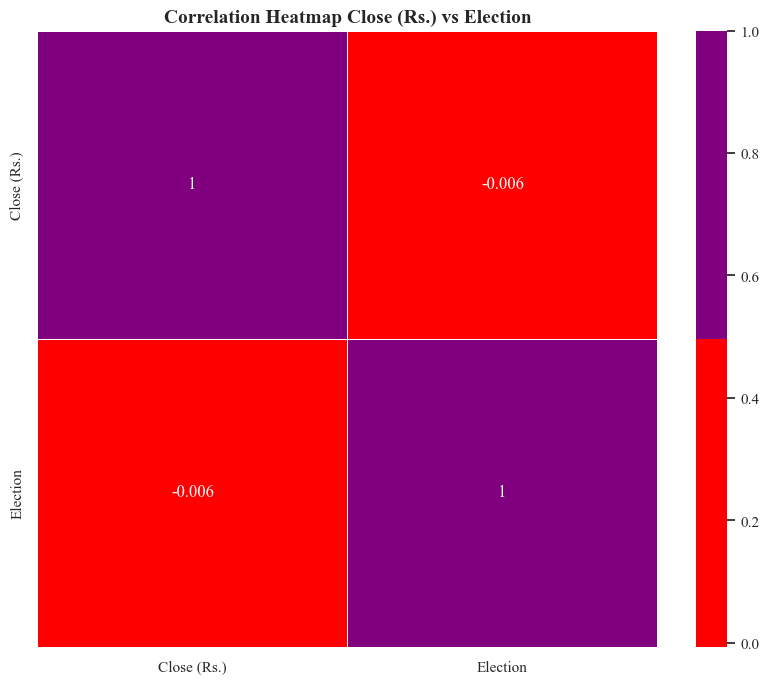

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font style to Times New Roman
sns.set(font="Times New Roman")

# Your DataFrame
data = pd.read_csv('./final_elections_vs_stock_values.csv')

df = pd.DataFrame(data)

# Select the columns you want for the heatmap
columns = ['Close (Rs.)', 'Election']

# Create a correlation matrix
corr_matrix = df[columns].corr()

# Create a custom color palette with "Close (Rs.)" in red and "Election" in purple
colors = ['red', 'purple']
cmap = sns.color_palette(colors, as_cmap=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, linewidths=0.5)
plt.title('Correlation Heatmap Close (Rs.) vs Election', fontweight='bold', fontsize=14)
plt.show()